# An Insight Into Policing Trends in Virginia


### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
By Kelly Gu, Alisha Qian, and Victoria Lu

## 1. DATA CLEANING

In [ ]:
import zipfile

!unzip /content/police-data.zip

Archive:  /content/police-data.zip
  inflating: community-policing-data.csv  
  inflating: __MACOSX/._community-policing-data.csv  


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
policing = pd.read_csv('/content/police-data/community-policing-data.csv')

<ipython-input-33-06afa45d3bb1>:5: DtypeWarning: Columns (5,10,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  policing = pd.read_csv('/content/police-data/community-policing-data.csv')


In [ ]:
print(policing.shape)
categorical_columns = policing.select_dtypes(include=['object']).columns.to_list()
print("Categorical columns:", categorical_columns)
print('missing values:\n', policing.isnull().sum())
print('basic stats:\n', policing.describe(include='all'))
print("First few rows:\n", policing.head())
print("\nUnique categories for each categorical column:")
for col in categorical_columns:
    print(f"{col}: {policing[col].unique()}")

(3371015, 21)
Categorical columns: ['STOP_DATE', 'AGENCY NAME', 'LOCATION', 'JURISDICTION', 'REASON FOR STOP', 'PERSON TYPE', 'RACE', 'ETHNICITY', 'GENDER', 'ENGLISH SPEAKING', 'ACTION TAKEN', 'SPECIFIC VIOLATION', 'VIRGINIA CRIME CODE', 'PERSON SEARCHED', 'VEHICLE SEARCHED', 'ADDITIONAL ARREST', 'FORCE USED BY OFFICER', 'FORCE USED BY SUBJECT', 'RESIDENCY', 'VIOLATION TYPE']
missing values:
 STOP_DATE                      0
AGENCY NAME                    0
LOCATION                    4963
JURISDICTION                   8
REASON FOR STOP            22366
PERSON TYPE               958398
RACE                          15
ETHNICITY                     22
AGE                           56
GENDER                      2906
ENGLISH SPEAKING          966913
ACTION TAKEN                4214
SPECIFIC VIOLATION         73011
VIRGINIA CRIME CODE      2052157
PERSON SEARCHED            24128
VEHICLE SEARCHED           28504
ADDITIONAL ARREST        2442425
FORCE USED BY OFFICER     966413
FORCE USED

In [34]:
policing = policing.dropna(subset=['FORCE USED BY OFFICER', 'FORCE USED BY SUBJECT','ACTION TAKEN','PERSON SEARCHED','VEHICLE SEARCHED'])
policing = policing.drop(['PERSON TYPE','VIRGINIA CRIME CODE','ADDITIONAL ARREST','VIOLATION TYPE','SPECIFIC VIOLATION','LOCATION','AGENCY NAME'],axis=1)
policing['RESIDENCY'] = policing['RESIDENCY'].fillna('UNKNOWN')
policing = policing.dropna()


In [ ]:
print('missing values:\n', policing.isnull().sum())
print(policing.shape)
policing.info()

missing values:
 STOP_DATE                0
JURISDICTION             0
REASON FOR STOP          0
PERSON TYPE              0
RACE                     0
ETHNICITY                0
AGE                      0
GENDER                   0
ENGLISH SPEAKING         0
ACTION TAKEN             0
PERSON SEARCHED          0
VEHICLE SEARCHED         0
FORCE USED BY OFFICER    0
FORCE USED BY SUBJECT    0
RESIDENCY                0
dtype: int64
(2399158, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 2399158 entries, 14151 to 3371014
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   STOP_DATE              object 
 1   JURISDICTION           object 
 2   REASON FOR STOP        object 
 3   PERSON TYPE            object 
 4   RACE                   object 
 5   ETHNICITY              object 
 6   AGE                    float64
 7   GENDER                 object 
 8   ENGLISH SPEAKING       object 
 9   ACTION TAKEN           object 
 10  PE

In [35]:
policing['STOP_DATE'] = pd.to_datetime(policing['STOP_DATE'], errors='coerce')
policing['YEAR'] = policing['STOP_DATE'].dt.year
policing['MONTH'] = policing['STOP_DATE'].dt.month
policing = policing.drop(['STOP_DATE'],axis=1)

In [ ]:
categorical_columns2 = policing.select_dtypes(include=['object']).columns.to_list()
for col2 in categorical_columns2:
    print(f"{col2}: {policing[col2].unique()}")

JURISDICTION: ['CULPEPER CO' 'AUGUSTA CO' 'FREDERICK CO' 'FAIRFAX CO' 'FAUQUIER CO'
 'LOUDOUN CO' 'PRINCE WILLIAM CO' 'ALEXANDRIA' 'ESSEX CO' 'HANOVER CO'
 'HENRICO CO' 'GREENSVILLE CO' 'FRANKLIN COUNTY' 'CLARKE CO' 'EMPORIA'
 'FLOYD CO' 'FLUVANNA CO' 'CRAIG CO' 'DINWIDDIE CO' 'CUMBERLAND CO'
 'GILES CO' 'GRAYSON CO' 'HALIFAX CO' 'GLOUCESTER CO' 'ARLINGTON CO'
 'GOOCHLAND CO' 'GREENE CO' 'DICKENSON CO' 'LYNCHBURG' 'YORK CO' 'NORFOLK'
 'STAUNTON' 'VIRGINIA BEACH' 'NORTON' 'BRISTOL' 'CAROLINE CO'
 'NORTHAMPTON CO' 'SUFFOLK' 'SPOTSYLVANIA CO' 'AMELIA CO'
 'PITTSYLVANIA CO' 'PRINCE EDWARD CO' 'ROANOKE CO' 'PULASKI CO'
 'AMHERST CO' 'BATH CO' 'SURRY CO' 'WYTHE CO' 'BEDFORD CO' 'WISE CO'
 'RICHMOND CO' 'SMYTH CO' 'PRINCE GEORGE CO' 'SCOTT CO' 'MONTGOMERY CO'
 'CHESAPEAKE' 'CAMPBELL CO' 'ORANGE CO' 'POWHATAN CO' 'LOUISA CO'
 'ALBEMARLE CO' 'ROCKINGHAM CO' 'BRUNSWICK CO' 'JAMES CITY CO'
 'SOUTHAMPTON CO' 'MECKLENBURG CO' 'PAGE CO' 'SHENANDOAH CO' 'HENRY CO'
 'NEW KENT CO' 'WAYNESBORO' 'CARROLL

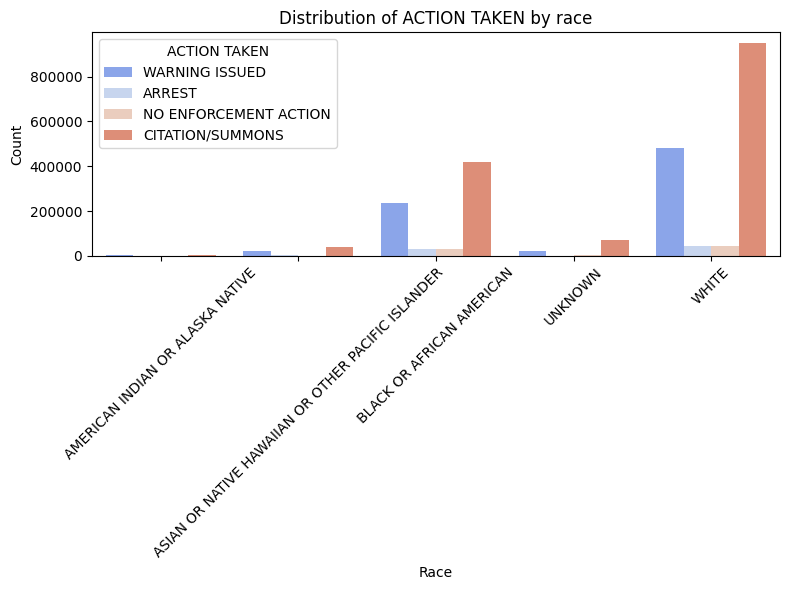

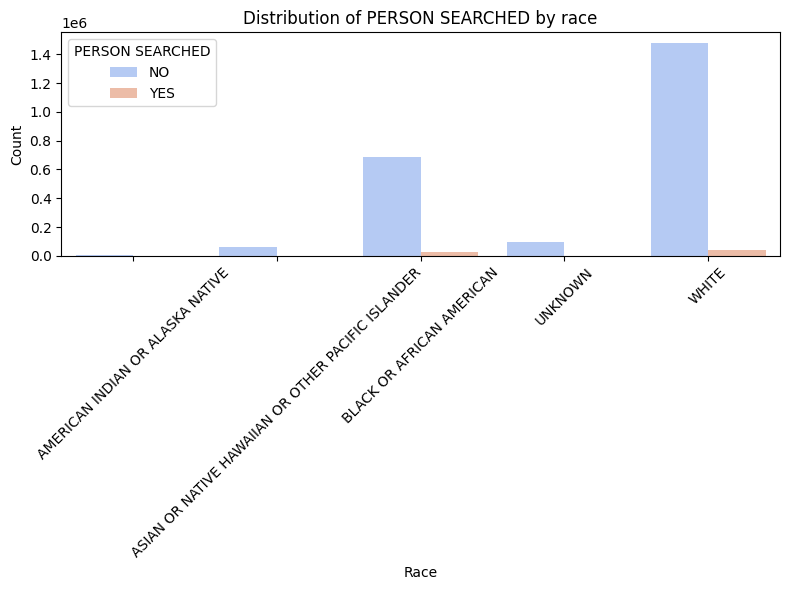

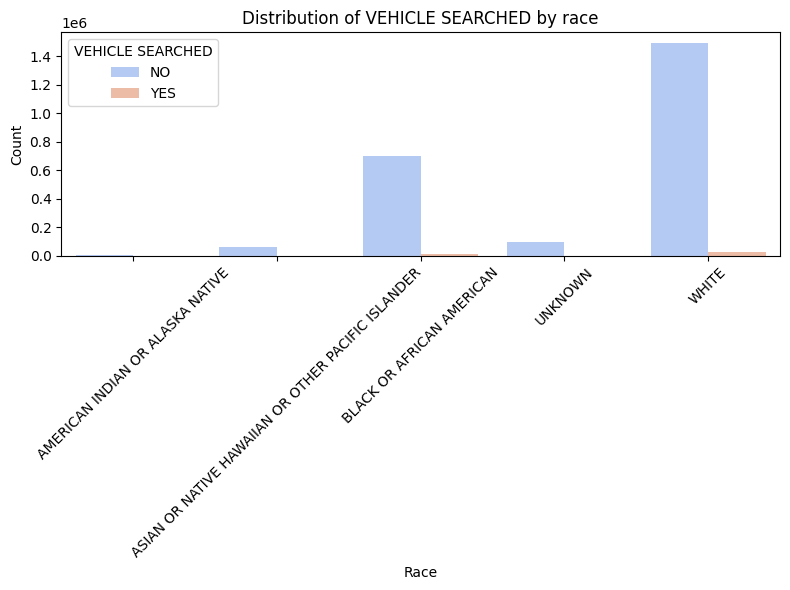

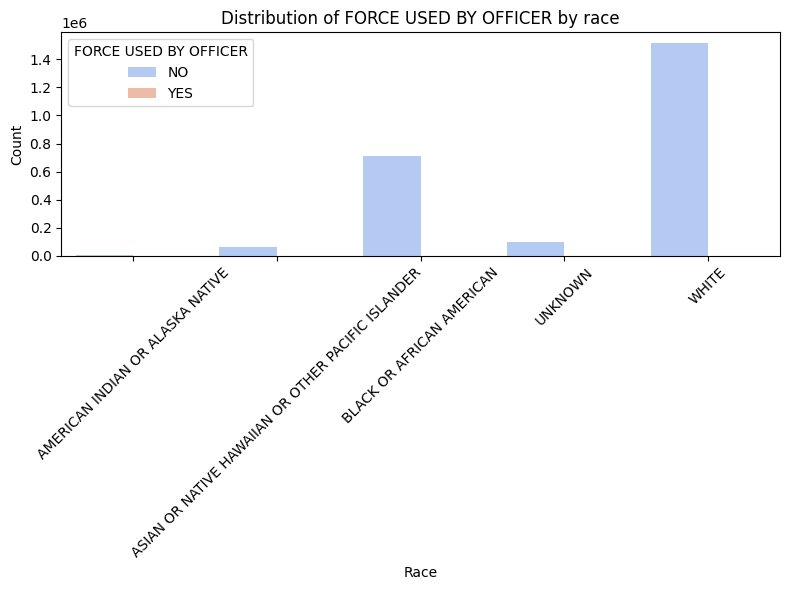

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


target_columns = ['ACTION TAKEN', 'PERSON SEARCHED', 'VEHICLE SEARCHED', 'FORCE USED BY OFFICER']
X = policing.drop(target_columns, axis=1)  # Features
y = policing[target_columns]  # Targets

# Combine features and targets for analysis
policing_combined = pd.concat([X, y], axis=1)

# Ensure 'RACE' is categorical
policing_combined['RACE'] = policing_combined['RACE'].astype('category')

# Plot the relationship for each target variable
for target in target_columns:
    unique_labels = policing_combined[target].unique()
    plt.figure(figsize=(8, 6))
    sns.countplot(
        data=policing_combined,
        x='RACE',
        hue=target,  # Separate bars by target variable value (0 or 1)
        palette='coolwarm'
    )
    plt.title(f'Distribution of {target} by race')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.legend(title=target, labels=unique_labels)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


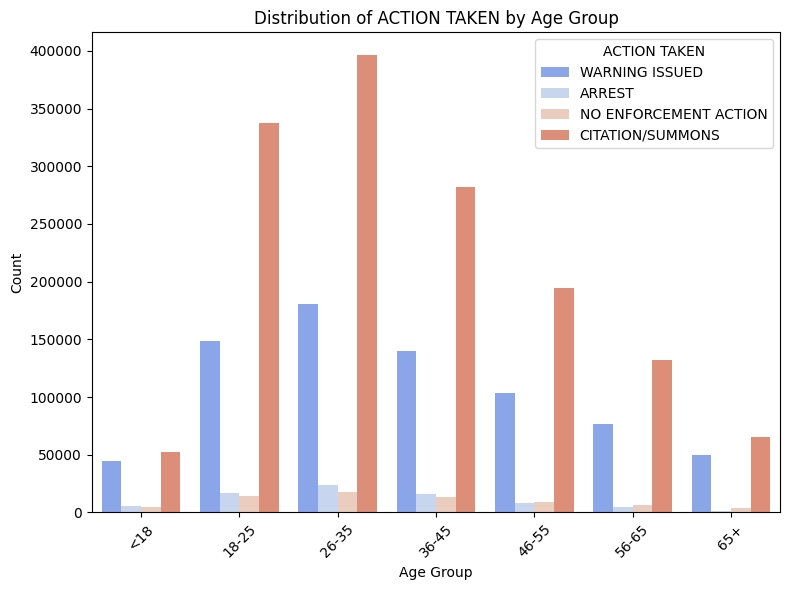

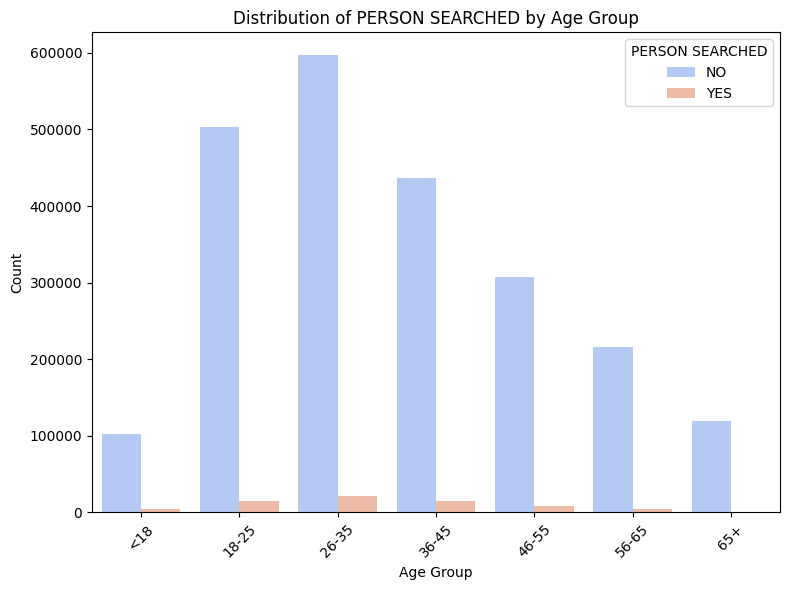

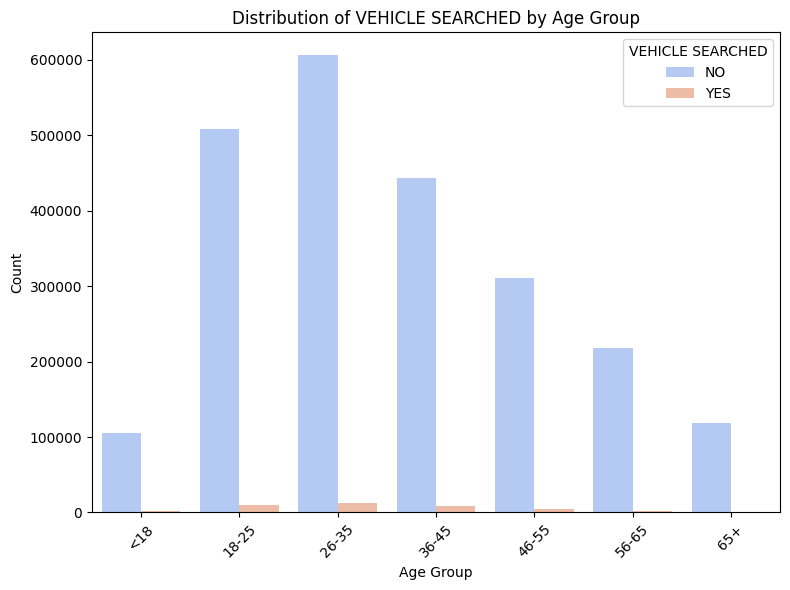

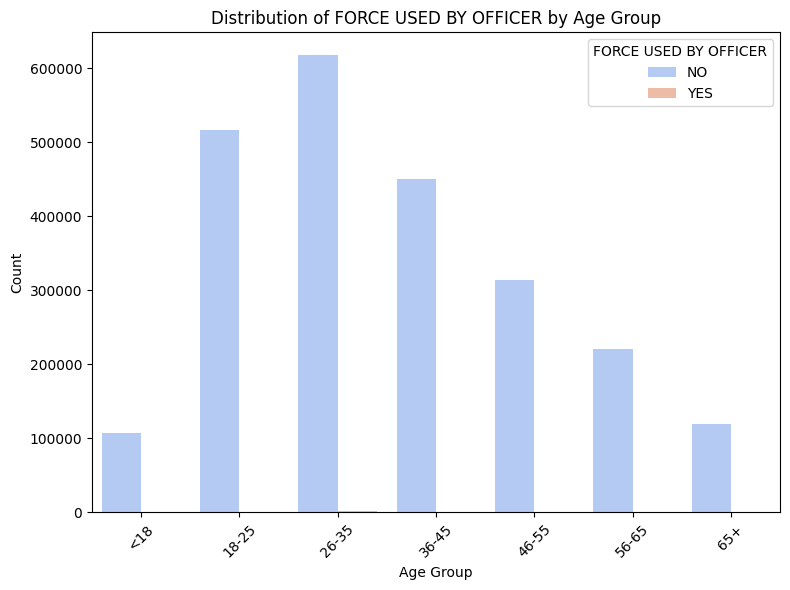

In [ ]:
# Bar plot of AGE importance across targets
# Bin ages into categories to simplify the x-axis
policing_combined['AGE_GROUP'] = pd.cut(
    policing_combined['AGE'],
    bins=[0, 18, 25, 35, 45, 55, 65, 100],
    labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
)

# Create bar plots
for target in target_columns:
    unique_labels = policing_combined[target].unique()
    plt.figure(figsize=(8, 6))
    sns.countplot(
        data=policing_combined,
        x='AGE_GROUP',
        hue=target,  # Separate bars by target variable value (0 or 1)
        palette='coolwarm'
    )
    plt.title(f'Distribution of {target} by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title=target, labels=unique_labels )
    plt.xticks(rotation=45)  # Ensure proper rotation for readability
    plt.tight_layout()
    plt.show()


In [36]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical variables
label_encoder = LabelEncoder()
# Ordinal
policing['FORCE USED BY OFFICER'] = label_encoder.fit_transform(policing['FORCE USED BY OFFICER'])
policing['FORCE USED BY SUBJECT'] = label_encoder.fit_transform(policing['FORCE USED BY SUBJECT'])
policing['PERSON SEARCHED'] = label_encoder.fit_transform(policing['PERSON SEARCHED'])
policing['VEHICLE SEARCHED'] = label_encoder.fit_transform(policing['VEHICLE SEARCHED'])
policing['ENGLISH SPEAKING'] = label_encoder.fit_transform(policing['ENGLISH SPEAKING'])
policing['ACTION TAKEN'] = label_encoder.fit_transform(policing['ACTION TAKEN'])

# Nonordinal
policing = pd.get_dummies(policing, columns=[
    'GENDER','JURISDICTION','REASON FOR STOP','RACE','ETHNICITY','RESIDENCY'
], drop_first=True)

In [ ]:
policing

,AGE,ENGLISH SPEAKING,ACTION TAKEN,PERSON SEARCHED,VEHICLE SEARCHED,FORCE USED BY OFFICER,FORCE USED BY SUBJECT,YEAR,MONTH,GENDER_MALE,...,REASON FOR STOP_WARRANT SERVICE,RACE_ASIAN OR NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,RACE_BLACK OR AFRICAN AMERICAN,RACE_UNKNOWN,RACE_WHITE,ETHNICITY_NOT HISPANIC OR LATINO,ETHNICITY_UNKNOWN,RESIDENCY_OUT OF STATE RESIDENT,RESIDENCY_RESIDENT OF CITY/COUNTY OF STOP,RESIDENCY_UNKNOWN
14151,28.0,1,3,0,0,0,0,2023,6,False,...,False,False,False,False,True,True,False,False,True,False
14152,54.0,1,3,0,0,0,0,2023,6,False,...,False,False,False,False,True,True,False,False,True,False
14153,30.0,1,0,1,1,0,0,2023,6,False,...,False,False,True,False,False,True,False,False,True,False
14154,23.0,1,2,0,1,0,0,2023,6,True,...,False,False,False,False,True,False,False,True,False,False
14155,22.0,1,3,0,0,0,0,2023,6,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371010,25.0,1,0,0,0,0,0,2023,9,True,...,True,False,False,False,True,False,False,False,True,False
3371011,35.0,1,0,0,0,0,0,2023,9,True,...,True,False,False,False,True,False,True,False,True,False
3371012,52.0,1,0,0,0,0,0,2023,9,True,...,True,True,False,False,False,True,False,False,True,False
3371013,18.0,1,0,1,0,0,0,2023,9,True,...,True,False,True,False,False,True,False,True,False,False


In [ ]:
# Convert column names to a list
column_list = policing.columns.tolist()

# Print the list (in chunks, if necessary)
for column in column_list:
    print(column)

AGE
ENGLISH SPEAKING
ACTION TAKEN
PERSON SEARCHED
VEHICLE SEARCHED
FORCE USED BY OFFICER
FORCE USED BY SUBJECT
YEAR
MONTH
GENDER_MALE
GENDER_OTHER
GENDER_UNKNOWN
JURISDICTION_000
JURISDICTION_002
JURISDICTION_023
JURISDICTION_035
JURISDICTION_053
JURISDICTION_058
JURISDICTION_076
JURISDICTION_1
JURISDICTION_10
JURISDICTION_100
JURISDICTION_101
JURISDICTION_102
JURISDICTION_103
JURISDICTION_105
JURISDICTION_106
JURISDICTION_107
JURISDICTION_108
JURISDICTION_109
JURISDICTION_11
JURISDICTION_110
JURISDICTION_111
JURISDICTION_112
JURISDICTION_113
JURISDICTION_114
JURISDICTION_115
JURISDICTION_116
JURISDICTION_117
JURISDICTION_118
JURISDICTION_119
JURISDICTION_12
JURISDICTION_120
JURISDICTION_121
JURISDICTION_123
JURISDICTION_124
JURISDICTION_125
JURISDICTION_126
JURISDICTION_127
JURISDICTION_128
JURISDICTION_129
JURISDICTION_13
JURISDICTION_130
JURISDICTION_131
JURISDICTION_132
JURISDICTION_133
JURISDICTION_135
JURISDICTION_136
JURISDICTION_137
JURISDICTION_138
JURISDICTION_139
JURISDICTIO

## 2. Decision Tree


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Target columns
target_columns = ['ACTION TAKEN', 'PERSON SEARCHED', 'VEHICLE SEARCHED', 'FORCE USED BY OFFICER']
X = policing.drop(target_columns, axis=1)
y = policing[target_columns]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the DecisionTreeClassifier with constraints
decision_tree_model = DecisionTreeClassifier(
    max_depth=10,               # Limit the depth of the tree
    min_samples_split=10,       # Minimum samples required to split a node
    min_samples_leaf=5,         # Minimum samples required at a leaf node
    random_state=42
)

# Wrap in MultiOutputClassifier
multi_target_model = MultiOutputClassifier(decision_tree_model, n_jobs=1)

In [ ]:
# Train the model
multi_target_model.fit(X_train, y_train)


MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                       min_samples_leaf=5,
                                                       min_samples_split=10,
                                                       random_state=42),
                      n_jobs=1)

In [ ]:
# Make predictions
y_pred = multi_target_model.predict(X_test)

# Evaluate accuracy for each target
for i, target in enumerate(target_columns):
    print(f"Accuracy for {target}: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")

    # Print classification report for each target
    print(f"\nClassification Report for {target}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print("="*50)  # Separator for better readability

Accuracy for ACTION TAKEN: 0.6388592595061707

Classification Report for ACTION TAKEN:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54     15283
           1       0.65      0.94      0.77    296498
           2       0.42      0.11      0.17     15708
           3       0.52      0.12      0.19    152515

    accuracy                           0.64    480004
   macro avg       0.55      0.41      0.42    480004
weighted avg       0.60      0.64      0.56    480004

Accuracy for PERSON SEARCHED: 0.971489820918159

Classification Report for PERSON SEARCHED:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    466037
           1       0.62      0.05      0.10     13967

    accuracy                           0.97    480004
   macro avg       0.80      0.53      0.54    480004
weighted avg       0.96      0.97      0.96    480004

Accuracy for VEHICLE SEARCHED: 0.9827313939050508

Classifi

In [ ]:
print("Original class distribution:")
print(policing['ACTION TAKEN'].value_counts())

df_0 = policing[policing['ACTION TAKEN'] == 0]
df_1 = policing[policing['ACTION TAKEN'] == 1].sample(n=77031, random_state=42)
df_2 = policing[policing['ACTION TAKEN'] == 2].sample(n=77031, random_state=42)
df_3 = policing[policing['ACTION TAKEN'] == 3].sample(n=77031, random_state=42)

df_balanced_at = pd.concat([df_0,df_1, df_2, df_3])

print("\nBalanced class distribution:")
print(df_balanced_at['ACTION TAKEN'].value_counts())

print("Original class distribution:")
print(policing['PERSON SEARCHED'].value_counts())

df_1 = policing[policing['PERSON SEARCHED'] == 1]
df_0 = policing[policing['PERSON SEARCHED'] == 0].sample(n=70201, random_state=42)

df_balanced_ps = pd.concat([df_0,df_1])

print("\nBalanced class distribution:")
print(df_balanced_ps['PERSON SEARCHED'].value_counts())

print("Original class distribution:")
print(policing['VEHICLE SEARCHED'].value_counts())

df_1 = policing[policing['VEHICLE SEARCHED'] == 1]
df_0 = policing[policing['VEHICLE SEARCHED'] == 0].sample(n=41816, random_state=42)

df_balanced_vs = pd.concat([df_0,df_1])

print("\nBalanced class distribution:")
print(df_balanced_vs['VEHICLE SEARCHED'].value_counts())

print("Original class distribution:")
print(policing['FORCE USED BY OFFICER'].value_counts())

df_1 = policing[policing['FORCE USED BY OFFICER'] == 1]
df_0 = policing[policing['FORCE USED BY OFFICER'] == 0].sample(n=4643, random_state=42)

df_balanced_fubo = pd.concat([df_0,df_1])

print("\nBalanced class distribution:")
print(df_balanced_fubo['FORCE USED BY OFFICER'].value_counts())

Original class distribution:
ACTION TAKEN
1    1482768
3     761830
2      78389
0      77031
Name: count, dtype: int64

Balanced class distribution:
ACTION TAKEN
0    77031
1    77031
2    77031
3    77031
Name: count, dtype: int64
Original class distribution:
PERSON SEARCHED
0    2329817
1      70201
Name: count, dtype: int64

Balanced class distribution:
PERSON SEARCHED
0    70201
1    70201
Name: count, dtype: int64
Original class distribution:
VEHICLE SEARCHED
0    2358202
1      41816
Name: count, dtype: int64

Balanced class distribution:
VEHICLE SEARCHED
0    41816
1    41816
Name: count, dtype: int64
Original class distribution:
FORCE USED BY OFFICER
0    2395375
1       4643
Name: count, dtype: int64

Balanced class distribution:
FORCE USED BY OFFICER
0    4643
1    4643
Name: count, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Step 2: Prepare the features (X) and target (y) for training and testing
target_columns = ['ACTION TAKEN', 'PERSON SEARCHED', 'VEHICLE SEARCHED', 'FORCE USED BY OFFICER']
X_balanced_train = df_balanced_at.drop(target_columns, axis=1)  # Balanced data for training
y_balanced_train = df_balanced_at['ACTION TAKEN']

# Step 3: Prepare the testing data (using the original unbalanced policing dataset)
X_test = policing.drop(target_columns, axis=1)  # Original dataset for testing
y_test = policing['ACTION TAKEN']

# Step 4: Initialize the DecisionTreeClassifier model
model_action_taken = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
    )

# Step 5: Train the model using the balanced training data
model_action_taken.fit(X_balanced_train, y_balanced_train)

# Step 6: Make predictions on the original testing set (unbalanced dataset)
y_pred_train = model_action_taken.predict(X_balanced_train)  # Predictions on training data
y_pred_test = model_action_taken.predict(X_test)  # Predictions on test data

# Step 7: Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_balanced_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Step 8: Print the accuracy scores and the value counts of predicted vs actual values
print(f"\nTraining Accuracy for ACTION TAKEN model: {train_accuracy:.4f}")
print(f"Testing Accuracy for ACTION TAKEN model: {test_accuracy:.4f}")

# Display actual value counts for ACTION TAKEN in the test set
print(f"\nActual value counts for ACTION TAKEN in test set:")
print(y_test.value_counts())

# Display predicted value counts for ACTION TAKEN
print(f"\nPredicted value counts for ACTION TAKEN:")
print(pd.Series(y_pred_test).value_counts())

print(classification_report(y_test, y_pred_test))

# Step 9: Feature Importance
# Extract feature importances (after model has been trained)
feature_importances = model_action_taken.feature_importances_

# Create a DataFrame to display feature importance with feature names
importance_df = pd.DataFrame({
    'Feature': X_balanced_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importances (excluding selected columns):")
print(importance_df)


Training Accuracy for ACTION TAKEN model: 0.4963
Testing Accuracy for ACTION TAKEN model: 0.5687

Actual value counts for ACTION TAKEN in test set:
ACTION TAKEN
1    1482768
3     761830
2      78389
0      77031
Name: count, dtype: int64

Predicted value counts for ACTION TAKEN:
1    1558150
3     554075
2     180073
0     107720
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.42      0.58      0.48     77031
           1       0.68      0.72      0.70   1482768
           2       0.17      0.39      0.23     78389
           3       0.41      0.30      0.34    761830

    accuracy                           0.57   2400018
   macro avg       0.42      0.50      0.44   2400018
weighted avg       0.57      0.57      0.56   2400018


Feature Importances (excluding selected columns):
                                              Feature  Importance
8                   REASON FOR STOP_CALLS FOR SERVICE    0.448559
13                  RE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Prepare the features (X) and target (y) for training and testing
X_balanced_train = df_balanced_ps.drop(target_columns, axis=1)  # Balanced data for training
y_balanced_train = df_balanced_ps['PERSON SEARCHED']

# Step 3: Prepare the testing data (using the original unbalanced policing dataset)
X_test = policing.drop(target_columns, axis=1)  # Original dataset for testing
y_test = policing['PERSON SEARCHED']

# Step 4: Initialize the DecisionTreeClassifier model
model_person_searched = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
    )

# Step 5: Train the model using the balanced training data
model_person_searched.fit(X_balanced_train, y_balanced_train)

# Step 6: Make predictions on the original testing set (unbalanced dataset)
y_pred_train = model_person_searched.predict(X_balanced_train)  # Predictions on training data
y_pred_test = model_person_searched.predict(X_test)  # Predictions on test data

# Step 7: Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_balanced_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Step 8: Print the accuracy scores and the value counts of predicted vs actual values
print(f"\nTraining Accuracy for PERSON SEARCHED model: {train_accuracy:.4f}")
print(f"Testing Accuracy for PERSON SEARCHED model: {test_accuracy:.4f}")

# Display actual value counts for PERSON SEARCHED in the test set
print(f"\nActual value counts for PERSON SEARCHED in test set:")
print(y_test.value_counts())

# Display predicted value counts for PERSON SEARCHED
print(f"\nPredicted value counts for PERSON SEARCHED:")
print(pd.Series(y_pred_test).value_counts())

print(classification_report(y_test, y_pred_test))

# Step 9: Feature Importance
# Extract feature importances (after model has been trained)
feature_importances = model_person_searched.feature_importances_

# Create a DataFrame to display feature importance with feature names
importance_df = pd.DataFrame({
    'Feature': X_balanced_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importances (excluding selected columns):")
print(importance_df)



Training Accuracy for PERSON SEARCHED model: 0.7493
Testing Accuracy for PERSON SEARCHED model: 0.8831

Actual value counts for PERSON SEARCHED in test set:
PERSON SEARCHED
0    2329817
1      70201
Name: count, dtype: int64

Predicted value counts for PERSON SEARCHED:
0    2105051
1     294967
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.99      0.89      0.94   2329817
           1       0.14      0.60      0.23     70201

    accuracy                           0.88   2400018
   macro avg       0.57      0.75      0.58   2400018
weighted avg       0.96      0.88      0.92   2400018


Feature Importances (excluding selected columns):
                                              Feature  Importance
13                  REASON FOR STOP_TRAFFIC VIOLATION    0.630623
10                REASON FOR STOP_EQUIPMENT VIOLATION    0.136702
0                                                 AGE    0.046682
5                                  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Prepare the features (X) and target (y) for training and testing
X_balanced_train = df_balanced_fubo.drop(target_columns, axis=1)  # Balanced data for training
y_balanced_train = df_balanced_fubo['FORCE USED BY OFFICER']

# Step 3: Prepare the testing data (using the original unbalanced policing dataset)
X_test = policing.drop(target_columns, axis=1)  # Original dataset for testing
y_test = policing['FORCE USED BY OFFICER']

# Step 4: Initialize the DecisionTreeClassifier model
model_force_used = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
    )

# Step 5: Train the model using the balanced training data
model_force_used.fit(X_balanced_train, y_balanced_train)

# Step 6: Make predictions on the original testing set (unbalanced dataset)
y_pred_train = model_force_used.predict(X_balanced_train)  # Predictions on training data
y_pred_test = model_force_used.predict(X_test)  # Predictions on test data

# Step 7: Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_balanced_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Step 8: Print the accuracy scores and the value counts of predicted vs actual values
print(f"\nTraining Accuracy for FORCE USED BY OFFICER model: {train_accuracy:.4f}")
print(f"Testing Accuracy for FORCE USED BY OFFICER model: {test_accuracy:.4f}")

# Display actual value counts for FORCE USED BY OFFICER in the test set
print(f"\nActual value counts for FORCE USED BY OFFICER in test set:")
print(y_test.value_counts())

# Display predicted value counts for FORCE USED BY OFFICER
print(f"\nPredicted value counts for FORCE USED BY OFFICER:")
print(pd.Series(y_pred_test).value_counts())

print(classification_report(y_test, y_pred_test))

# Step 9: Feature Importance
# Extract feature importances (after model has been trained)
feature_importances = model_force_used.feature_importances_

# Create a DataFrame to display feature importance with feature names
importance_df = pd.DataFrame({
    'Feature': X_balanced_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importances (excluding selected columns):")
print(importance_df)



Training Accuracy for FORCE USED BY OFFICER model: 0.8486
Testing Accuracy for FORCE USED BY OFFICER model: 0.9311

Actual value counts for FORCE USED BY OFFICER in test set:
FORCE USED BY OFFICER
0    2395375
1       4643
Name: count, dtype: int64

Predicted value counts for FORCE USED BY OFFICER:
0    2232400
1     167618
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       1.00      0.93      0.96   2395375
           1       0.02      0.75      0.04      4643

    accuracy                           0.93   2400018
   macro avg       0.51      0.84      0.50   2400018
weighted avg       1.00      0.93      0.96   2400018


Feature Importances (excluding selected columns):
                                              Feature  Importance
2                               FORCE USED BY SUBJECT    0.637888
13                  REASON FOR STOP_TRAFFIC VIOLATION    0.178281
10                REASON FOR STOP_EQUIPMENT VIOLATION    0.052536
0    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Step 2: Prepare the features (X) and target (y) for training and testing
X_balanced_train = df_balanced_vs.drop(target_columns, axis=1)  # Balanced data for training
y_balanced_train = df_balanced_vs['VEHICLE SEARCHED']

# Step 3: Prepare the testing data (using the original unbalanced policing dataset)
X_test = policing.drop(target_columns, axis=1)  # Original dataset for testing
y_test = policing['VEHICLE SEARCHED']

# Step 4: Initialize the DecisionTreeClassifier model
model_force_used = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
    )

# Step 5: Train the model using the balanced training data
model_force_used.fit(X_balanced_train, y_balanced_train)

# Step 6: Make predictions on the original testing set (unbalanced dataset)
y_pred_train = model_force_used.predict(X_balanced_train)  # Predictions on training data
y_pred_test = model_force_used.predict(X_test)  # Predictions on test data

# Step 7: Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_balanced_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Step 8: Print the accuracy scores and the value counts of predicted vs actual values
print(f"\nTraining Accuracy for VEHICLE SEARCHED model: {train_accuracy:.4f}")
print(f"Testing Accuracy for VEHICLE SEARCHED model: {test_accuracy:.4f}")

# Display actual value counts for VEHICLE SEARCHED in the test set
print(f"\nActual value counts for VEHICLE SEARCHED in test set:")
print(y_test.value_counts())

# Display predicted value counts for VEHICLE SEARCHED
print(f"\nPredicted value counts for VEHICLE SEARCHED:")
print(pd.Series(y_pred_test).value_counts())

print(classification_report(y_test, y_pred_test))

# Step 9: Feature Importance
# Extract feature importances (after model has been trained)
feature_importances = model_force_used.feature_importances_

# Create a DataFrame to display feature importance with feature names
importance_df = pd.DataFrame({
    'Feature': X_balanced_train.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importances (excluding selected columns):")
print(importance_df)



Training Accuracy for VEHICLE SEARCHED model: 0.6514
Testing Accuracy for VEHICLE SEARCHED model: 0.5920

Actual value counts for VEHICLE SEARCHED in test set:
VEHICLE SEARCHED
0    2358202
1      41816
Name: count, dtype: int64

Predicted value counts for VEHICLE SEARCHED:
0    1403951
1     996067
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.99      0.59      0.74   2358202
           1       0.03      0.70      0.06     41816

    accuracy                           0.59   2400018
   macro avg       0.51      0.65      0.40   2400018
weighted avg       0.97      0.59      0.73   2400018


Feature Importances (excluding selected columns):
                                              Feature  Importance
13                  REASON FOR STOP_TRAFFIC VIOLATION    0.247172
0                                                 AGE    0.174973
5                                         GENDER_MALE    0.142157
21                    RESIDENC

## 3. Gradient Boosting Machine

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

#target labels
target_columns = ['ACTION TAKEN', 'PERSON SEARCHED', 'VEHICLE SEARCHED', 'FORCE USED BY OFFICER']

#features and labels
X = policing.drop(target_columns, axis=1)
y = policing[target_columns]

#reduce dataset size
sample_size = 500_000
policing_sampled = policing.sample(n=sample_size, random_state=42)
X = policing_sampled.drop(target_columns, axis=1)
y = policing_sampled[target_columns]

#categorical and numerical columns
categorical_columns = []
numerical_columns = [col for col in X.columns if col not in target_columns]

#preprocessing pipeline
preprocessor = make_column_transformer(
    (OrdinalEncoder(), categorical_columns),  #encode categorical features
    (StandardScaler(), numerical_columns),    #scale numerical features
    remainder="passthrough"                   #leave other columns as is
)

#define the gradient boosting model
gb_model = make_pipeline(
    preprocessor,
    PCA(n_components=20, random_state=42),  #dim reduction
    MultiOutputClassifier(
        HistGradientBoostingClassifier(
            max_depth=10,               #max depth of trees
            max_iter=100,               #num of boosting iterations
            learning_rate=0.1,
            min_samples_leaf=5,         #min samples per leaf
            random_state=42
        ),
        n_jobs=1
    )
)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
gb_model.fit(X_train, y_train)

#predict on test data
y_pred = gb_model.predict(X_test)

#evaluate model performance for each label
for i, target in enumerate(target_columns):
    print(f"Gradient Boosting Accuracy for {target}: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")

#evaluate overall performance
overall_accuracy = np.mean([accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(len(target_columns))])
print(f"Overall Accuracy: {overall_accuracy:.4f}")

#display predictions vs actuals for inspection
comparison_df = pd.DataFrame(y_test.values, columns=target_columns, index=y_test.index)
for i, target in enumerate(target_columns):
    comparison_df[f'Predicted {target}'] = y_pred[:, i]
print(comparison_df.head())  #show first few rows



Gradient Boosting Accuracy for ACTION TAKEN: 0.66073
Gradient Boosting Accuracy for PERSON SEARCHED: 0.97173
Gradient Boosting Accuracy for VEHICLE SEARCHED: 0.98252
Gradient Boosting Accuracy for FORCE USED BY OFFICER: 0.99773
Overall Accuracy: 0.9032
         ACTION TAKEN  PERSON SEARCHED  VEHICLE SEARCHED  \
1131007             1                0                 0   
1024900             1                0                 0   
2399403             1                0                 0   
3105999             3                0                 0   
1995417             1                0                 0   

         FORCE USED BY OFFICER  Predicted ACTION TAKEN  \
1131007                      0                       1   
1024900                      0                       1   
2399403                      0                       3   
3105999                      0                       1   
1995417                      0                       1   

         Predicted PERSON SEARCHED  P

In [ ]:
for i, target in enumerate(target_columns):
    print(f"Prediction counts for {target}:")
    prediction_counts = pd.Series(y_pred[:, i]).value_counts()
    print(prediction_counts)
    print()

Prediction counts for ACTION TAKEN:
1    84108
3    12306
0     2182
2     1404
Name: count, dtype: int64

Prediction counts for PERSON SEARCHED:
0    99300
1      700
Name: count, dtype: int64

Prediction counts for VEHICLE SEARCHED:
0    99898
1      102
Name: count, dtype: int64

Prediction counts for FORCE USED BY OFFICER:
0    99846
1      154
Name: count, dtype: int64



In [ ]:
# Display the actual counts for each target variable
for i, target in enumerate(target_columns):
    print(f"Actual value counts for {target}:")
    actual_counts = y_test.iloc[:, i].value_counts()
    print(actual_counts)
    print()


Actual value counts for ACTION TAKEN:
ACTION TAKEN
1    61697
3    31989
0     3160
2     3154
Name: count, dtype: int64

Actual value counts for PERSON SEARCHED:
PERSON SEARCHED
0    97071
1     2929
Name: count, dtype: int64

Actual value counts for VEHICLE SEARCHED:
VEHICLE SEARCHED
0    98312
1     1688
Name: count, dtype: int64

Actual value counts for FORCE USED BY OFFICER:
FORCE USED BY OFFICER
0    99795
1      205
Name: count, dtype: int64



## 4. K-Nearest Neighbor

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 1. Target labels
target_columns = ['ACTION TAKEN', 'PERSON SEARCHED', 'VEHICLE SEARCHED', 'FORCE USED BY OFFICER']

# 2. Features and labels
X = policing.drop(target_columns, axis=1)
y = policing[target_columns]

# Reduce dataset size for faster experimentation
sample_size = 500_000
policing_sampled = policing.sample(n=sample_size, random_state=42)
X = policing_sampled.drop(target_columns, axis=1)
y = policing_sampled[target_columns]

# 3. Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dimensionality reduction (PCA)
pca = PCA(n_components=50, random_state=42)  # Reduce to 50 dimensions
X_reduced = pca.fit_transform(X_scaled)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 6. Train a KNN classifier with MultiOutput
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', n_jobs=1)
multi_target_knn_model = MultiOutputClassifier(knn_model, n_jobs=1)

# Train the model
multi_target_knn_model.fit(X_train, y_train)

# 7. Predict on test data
y_pred = multi_target_knn_model.predict(X_test)

# 8. Evaluate model performance for each label
for i, target in enumerate(target_columns):
    print(f"KNN Accuracy for {target}: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}")


KNN Accuracy for ACTION TAKEN: 0.64286
KNN Accuracy for PERSON SEARCHED: 0.97068
KNN Accuracy for VEHICLE SEARCHED: 0.98235
KNN Accuracy for FORCE USED BY OFFICER: 0.99827
